#### Python Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

#### Data Collection

##### Importing and Loading of the dataset from the local repository

In [2]:
df = pd.read_csv('customer_churn.csv')

##### Displaying the top 5 records of the dataset

In [3]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Displaying the last 5 records of the dataset

In [4]:
df.tail()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Exploratory Data Analysis

##### Displaying the number of rows and columns of the dataset

In [5]:
print(f"The number of rows of the dataset : {df.shape[0]}")
print(f"The number of columns of the dataset : {df.shape[1]}")

The number of rows of the dataset : 7043
The number of columns of the dataset : 21


##### Displaying the complete information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges column should be of either int type or of float type. But it is currently in object type.

##### Displaying the complete statistical description of the dataset

In [7]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Checking for the existance of the null values in the dataset

In [8]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Removing the null values from the dataset

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Checking for the existence of the dupicates in the dataset

In [10]:
df.duplicated().sum()

0

##### Removing the duplicate values present inside the dataset

In [11]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

##### Converting the datatype of the TotalCharges column

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Removing the CustomerID column from the dataset

In [13]:
df.drop(columns='CustomerID',inplace=True)
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Displaying random set of records of the dataset for verification

In [14]:
df.sample(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6883,Female,0,No,Yes,34,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.35,3688.60,No
2536,Male,0,No,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.30,676.35,Yes
1961,Female,0,No,No,42,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),60.15,2421.60,No
6946,Female,0,No,Yes,48,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
1904,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,Yes
4889,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.45,5317.80,No
5393,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.60,70.60,Yes
2304,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.90,6733.15,No
158,Male,0,Yes,Yes,16,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Two year,No,Mailed check,64.25,1024.00,No
3890,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes


##### Displaying the number of numerical as well as categorical columns

In [15]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

print(f"Numerical Columns : {numerical_columns}")
print(f"Number of Numerical Columns : {len(numerical_columns)}")
print(f"Categorical Columns : {categorical_columns}")
print(f"Number of Categorical Columns : {len(categorical_columns)}")

Numerical Columns : ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
Number of Numerical Columns : 4
Categorical Columns : ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Number of Categorical Columns : 16


##### Displaying the value counts of each categorical columns

In [16]:
for col in categorical_columns :
    print(df[col].value_counts())
    print('\n')

Gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


StreamingTV
No       

##### Displaying the number of males and females who are about to churn or not

In [17]:
print(f"Number of males who are in churn condition : {len(df[(df['Gender']=='Male')&(df['Churn']=='Yes')])}")
print(f"Number of females who are in churn condition : {len(df[(df['Gender']=='Female')&(df['Churn']=='Yes')])}")
print(f"Number of males who are in churn condition : {len(df[(df['Gender']=='Male')&(df['Churn']=='No')])}")
print(f"Number of females who are in churn condition : {len(df[(df['Gender']=='Female')&(df['Churn']=='No')])}")

Number of males who are in churn condition : 930
Number of females who are in churn condition : 939
Number of males who are in churn condition : 2625
Number of females who are in churn condition : 2549


##### Displaying the total population churning out or not

In [18]:
print(f"Total Population who are churning out : {len(df[df['Churn']=='Yes'])}")
print(f"Total Population who are not churning out : {len(df[df['Churn']=='No'])}")

Total Population who are churning out : 1869
Total Population who are not churning out : 5174


##### Displaying the percentage of males or females who are churning out

In [19]:
print(f"Percentage of Males who are churning out : {(930/1869)*100}")
print(f"Percentage of Females who are churning out : {(939/1869)*100}")

Percentage of Males who are churning out : 49.75922953451043
Percentage of Females who are churning out : 50.24077046548957


##### Displaying the Senior Citizen as well as Non Senior Citizen who are churning out

In [20]:
print(f"Number of Senior Citizen Who are churning out : {len(df[(df['SeniorCitizen']==1)&(df['Churn']=='Yes')])}")
print(f"Number of Non Senior Citizen Who are churning out : {len(df[(df['SeniorCitizen']==0)&(df['Churn']=='Yes')])}")

Number of Senior Citizen Who are churning out : 476
Number of Non Senior Citizen Who are churning out : 1393


##### Number of customers who are churning out does not have any access to the internet

In [21]:
print(f"Customers who have churned out and dont have access to the internet : {len(df[(df['OnlineSecurity']=='No internet service')&(df['OnlineBackup']=='No internet service')&(df['DeviceProtection']=='No internet service')&(df['TechSupport']=='No internet service')&(df['StreamingTV']=='No internet service')&(df['StreamingMovies']=='No internet service')&(df['Churn']=='Yes')])}")
print(f"Customers who have not churned out and dont have access to the internet : {len(df[(df['OnlineSecurity']=='No internet service')&(df['OnlineBackup']=='No internet service')&(df['DeviceProtection']=='No internet service')&(df['TechSupport']=='No internet service')&(df['StreamingTV']=='No internet service')&(df['StreamingMovies']=='No internet service')&(df['Churn']=='No')])}")

Customers who have churned out and dont have access to the internet : 113
Customers who have not churned out and dont have access to the internet : 1413


#### Data Visualization

##### Checking for the outliers of the numerical columns

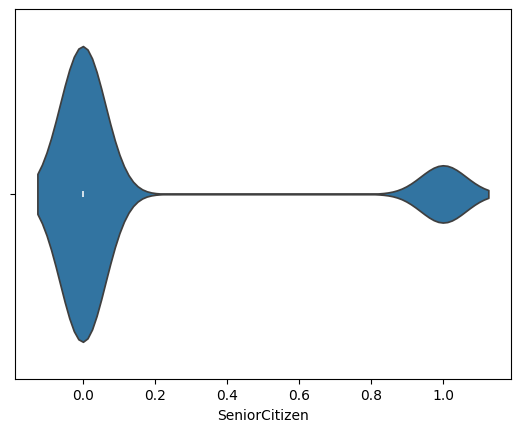

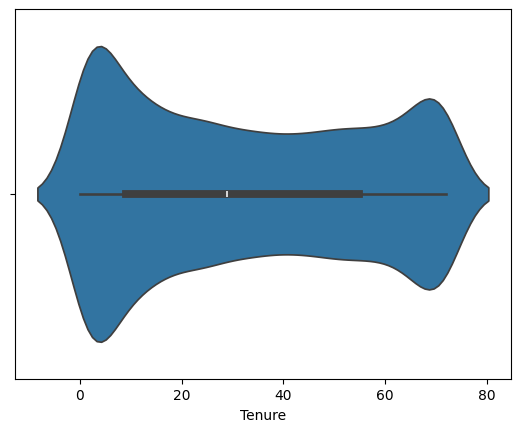

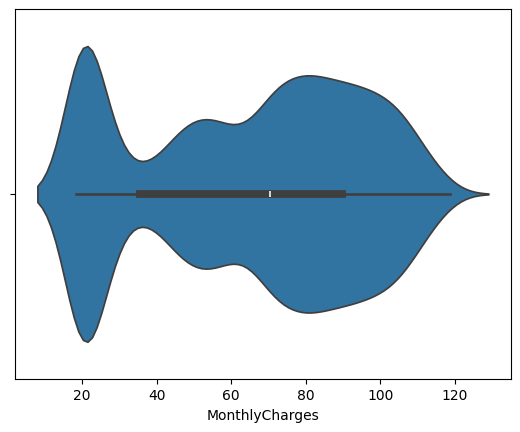

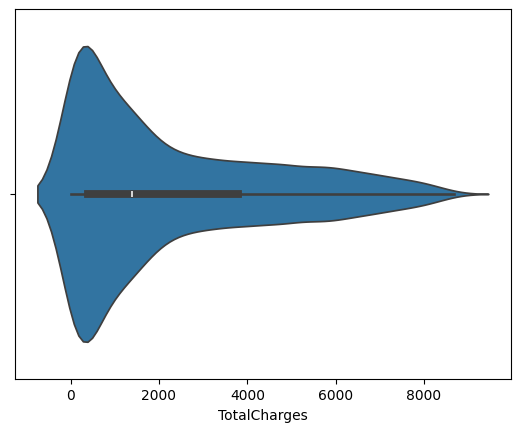

In [22]:
for col in numerical_columns :
    sns.violinplot(data=df,x=col)
    plt.show()

**Insights :**
* From the above observation, we can clearly see that there are no outliers present inside the dataset.

##### Plotting the distribution of the numerical columns of the dataset

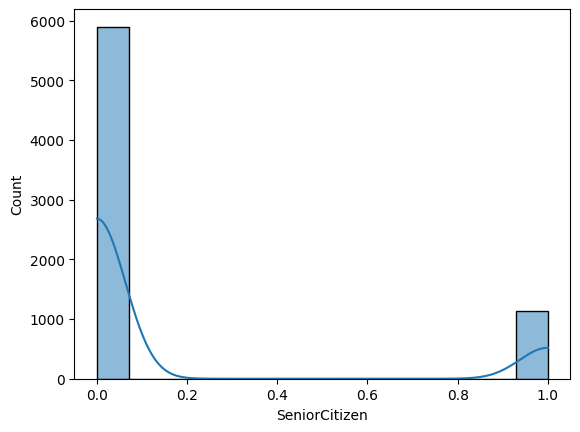

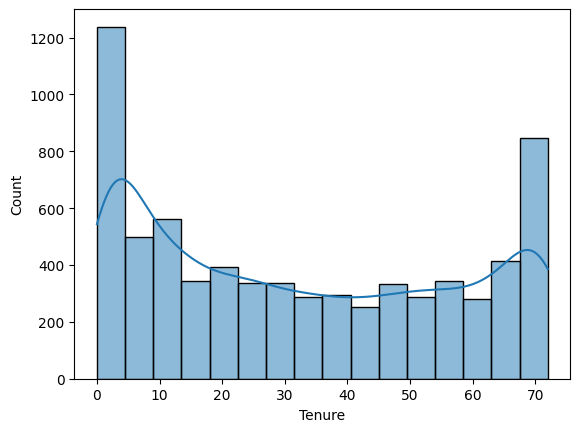

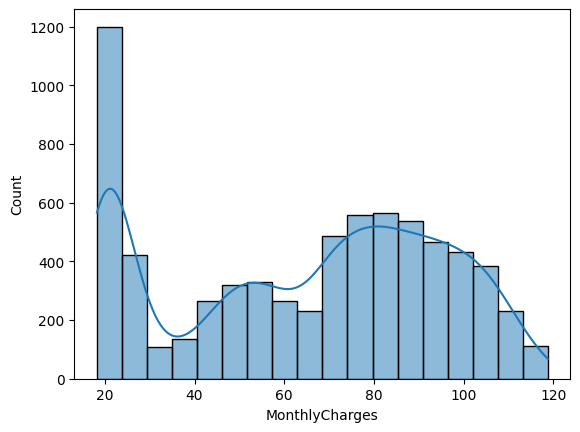

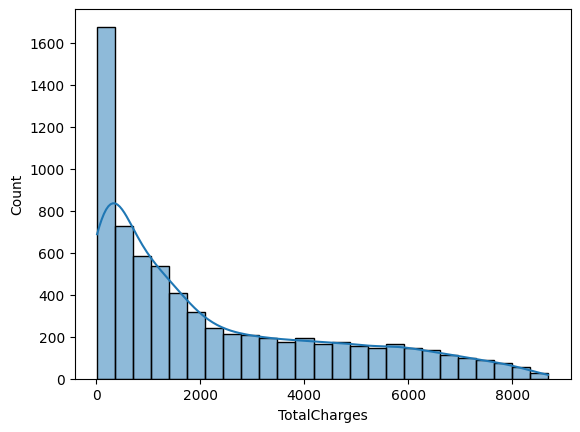

In [23]:
for col in numerical_columns :
    sns.histplot(data=df,x=col,kde=True)
    plt.show()

##### Plotting the customers who are churning out or not by gender-wise

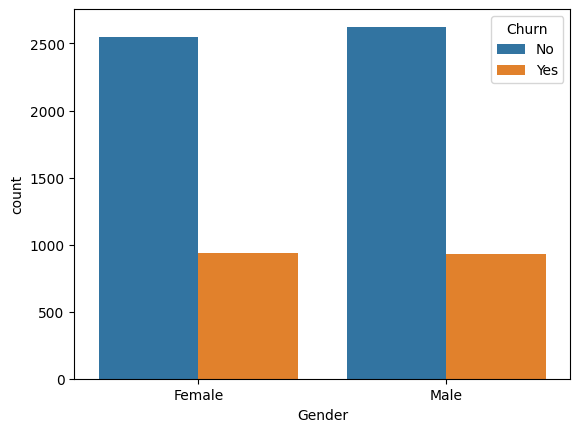

In [24]:
sns.countplot(data=df,x='Gender',hue='Churn')
plt.show()

**Insights :**
* It can be observed from the above map that the number of males as well as the number of females who are churning out is nearly equal

##### Plotting the count of Senior Citizens who are churning out

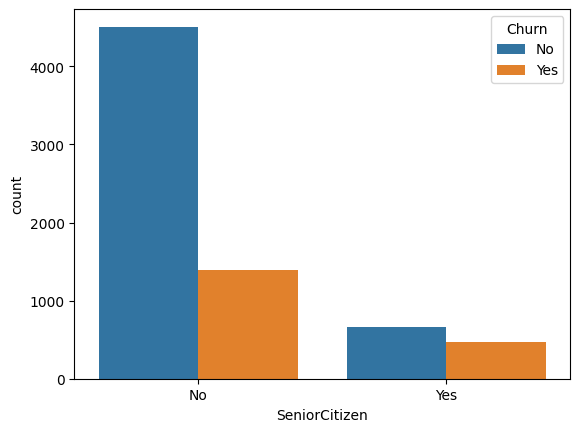

In [25]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

**Insights :**
* The number of customers who are not SeniorCitizen and are churning out are one-fourth of the number of customers who are not SeniorCitizen and are not churning out.
* The number of customers who are SeniorCitizen and are churning out are three-fourth of the number of customers who are SeniorCitizen and are not churning out.

##### Plotting the count of customers who have partner and are churning out or not

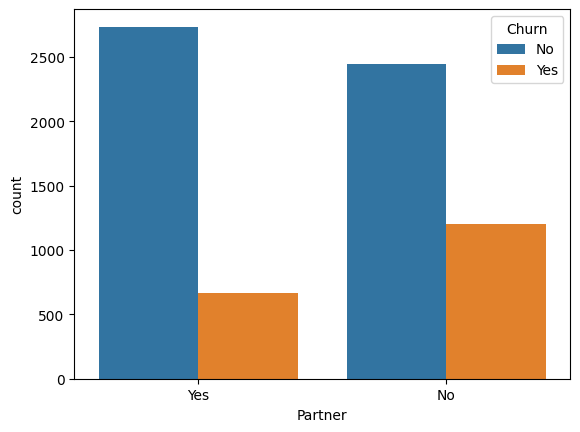

In [27]:
sns.countplot(data=df,x='Partner',hue='Churn')
plt.show()

**Insights :**
* In population who have partner, the number of customers who are churning out is nearly one-fourth of the number of customers who are not churning out.
* In population who dont have partner, the number of customers who are churning out is nearly half of the number of customers who are not churning out.

##### Plotting the count of customers who have dependents and are churning out or not

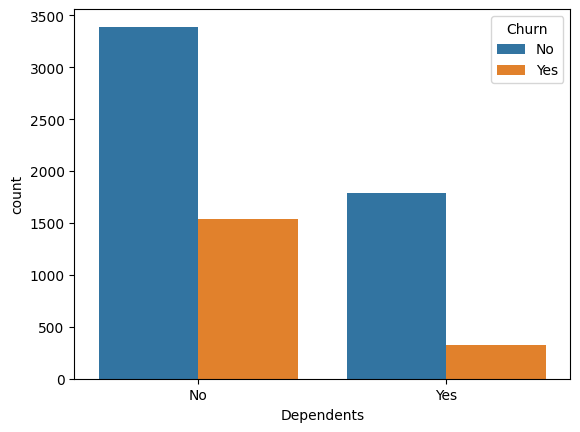

In [28]:
sns.countplot(data=df,x='Dependents',hue='Churn')
plt.show()

**Insights :**
* In positive dependents population, the number of customers who are churning out is nearly about one-fifth of the number of customers who are not churning out.
* In negative dependents population, the number of customers who are churning out is nearly about two-fifth of the number of customers who are not churning out.

##### Plotting the count of customers who are churning out have PhoneService or not

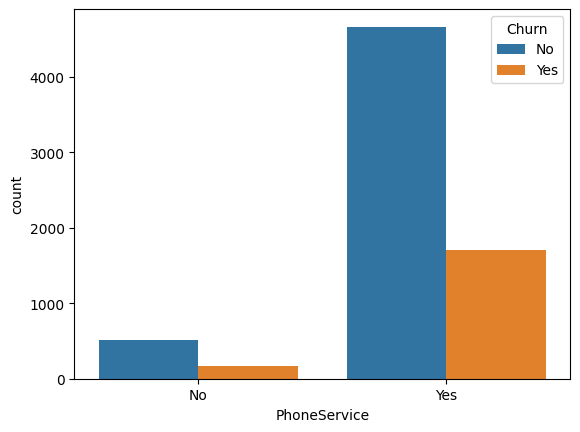

In [29]:
sns.countplot(data=df,x='PhoneService',hue='Churn')
plt.show()